In [1]:
import h5py
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
import os

from networkx.algorithms import community
from uoineuro.coupling_utils import *

%matplotlib inline

In [2]:
base_path = os.path.join(os.environ['HOME'], 'fits/uoineuro/coupling')

In [3]:
# consolidate AC results
ac_results_path = os.path.join(base_path, 'ecog/ecog_coupling.h5')
ac_results = h5py.File(ac_results_path, 'r')
ac_lasso_ccs = np.median(ac_results['lasso/coupling_coefs'], axis=0)
ac_uoi_lasso_ccs = np.median(ac_results['uoi_lasso_bic/coupling_coefs'], axis=0)

In [4]:
# consolidate VC results
vc_results_paths = [os.path.join(base_path, 'pvc11/pvc11_monkey1_coupling.h5'),
                    os.path.join(base_path, 'pvc11/pvc11_monkey2_coupling.h5'),
                    os.path.join(base_path, 'pvc11/pvc11_monkey3_coupling.h5')]
n_vc_fits = len(vc_results_paths)
vc_results = [h5py.File(vc_results_path, 'r')
              for vc_results_path in vc_results_paths]
# extract coupling coefficients
vc_lasso_ccs = [np.median(vc_result['lasso/coupling_coefs'], axis=0)
                for vc_result in vc_results]
vc_uoi_lasso_ccs = [np.median(vc_result['uoi_lasso_bic/coupling_coefs'], axis=0)
              for vc_result in vc_results]
vc_glmnet_ccs = [np.median(vc_result['glmnet_poisson/coupling_coefs'], axis=0)
                for vc_result in vc_results]
vc_uoi_poisson_ccs = [np.median(vc_result['uoi_poisson_bic/coupling_coefs'], axis=0)
              for vc_result in vc_results]

In [5]:
# consolidate MC results
mc_results_paths = [os.path.join(base_path, 'nhp/nhp_indy_20160407_02_coupling.h5'),
                    os.path.join(base_path, 'nhp/nhp_indy_20160411_01_coupling.h5'),
                    os.path.join(base_path, 'nhp/nhp_indy_20160411_02_coupling.h5')]
n_mc_fits = len(mc_results_paths)
mc_results = [h5py.File(mc_results_path, 'r')
              for mc_results_path in mc_results_paths]
# extract coupling coefficients
mc_lasso_ccs = [np.median(mc_result['lasso/coupling_coefs'], axis=0)
                for mc_result in mc_results]
mc_uoi_lasso_ccs = [np.median(mc_result['uoi_lasso_bic/coupling_coefs'], axis=0)
              for mc_result in mc_results]
mc_glmnet_ccs = [np.median(mc_result['glmnet_poisson/coupling_coefs'], axis=0)
                for mc_result in mc_results]
mc_uoi_poisson_ccs = [np.median(mc_result['uoi_poisson_bic/coupling_coefs'], axis=0)
              for mc_result in mc_results]

In [6]:
lasso_ccs = [ac_lasso_ccs] + vc_lasso_ccs + mc_lasso_ccs
uoi_lasso_ccs = [ac_uoi_lasso_ccs] + vc_uoi_lasso_ccs + mc_uoi_lasso_ccs
glmnet_ccs = vc_glmnet_ccs + mc_glmnet_ccs
uoi_poisson_ccs = vc_uoi_poisson_ccs + mc_uoi_poisson_ccs

In [7]:
lasso_sgraphs = [create_symmetrized_graph(lasso_ccs[idx])[0]
                for idx in range(len(lasso_ccs))]
uoi_lasso_sgraphs = [create_symmetrized_graph(uoi_lasso_ccs[idx])[0]
                    for idx in range(len(uoi_lasso_ccs))]
glmnet_sgraphs = [create_symmetrized_graph(glmnet_ccs[idx])[0]
                 for idx in range(len(glmnet_ccs))]
uoi_poisson_sgraphs = [create_symmetrized_graph(uoi_poisson_ccs[idx])[0]
                      for idx in range(len(uoi_poisson_ccs))]

In [8]:
lasso_dgraphs = [create_directed_graph(lasso_ccs[idx], weighted=True)
                for idx in range(len(lasso_ccs))]
uoi_lasso_dgraphs = [create_directed_graph(uoi_lasso_ccs[idx], weighted=True)
                    for idx in range(len(uoi_lasso_ccs))]
glmnet_dgraphs = [create_directed_graph(glmnet_ccs[idx], weighted=True)
                 for idx in range(len(glmnet_ccs))]
uoi_poisson_dgraphs = [create_directed_graph(uoi_poisson_ccs[idx], weighted=True)
                      for idx in range(len(uoi_poisson_ccs))]

In [9]:
d_graphs = {
    'ac_baseline': lasso_dgraphs[0],
    'ac_uoi': uoi_lasso_dgraphs[0],
    'vc_monkey1_baseline': glmnet_dgraphs[0],
    'vc_monkey2_baseline': glmnet_dgraphs[1],
    'vc_monkey3_baseline': glmnet_dgraphs[2],
    'mc_monkey1_baseline': glmnet_dgraphs[3],
    'mc_monkey2_baseline': glmnet_dgraphs[4],
    'mc_monkey3_baseline': glmnet_dgraphs[5],
    'vc_monkey1_uoi': uoi_poisson_dgraphs[0],
    'vc_monkey2_uoi': uoi_poisson_dgraphs[1],
    'vc_monkey3_uoi': uoi_poisson_dgraphs[2],
    'mc_monkey1_uoi': uoi_poisson_dgraphs[3],
    'mc_monkey2_uoi': uoi_poisson_dgraphs[4],
    'mc_monkey3_uoi': uoi_poisson_dgraphs[5],
}

In [10]:
s_graphs = {
    'ac_baseline': lasso_sgraphs[0],
    'ac_uoi': uoi_lasso_sgraphs[0],
    'vc_monkey1_baseline': glmnet_sgraphs[0],
    'vc_monkey2_baseline': glmnet_sgraphs[1],
    'vc_monkey3_baseline': glmnet_sgraphs[2],
    'mc_monkey1_baseline': glmnet_sgraphs[3],
    'mc_monkey2_baseline': glmnet_sgraphs[4],
    'mc_monkey3_baseline': glmnet_sgraphs[5],
    'vc_monkey1_uoi': uoi_poisson_sgraphs[0],
    'vc_monkey2_uoi': uoi_poisson_sgraphs[1],
    'vc_monkey3_uoi': uoi_poisson_sgraphs[2],
    'mc_monkey1_uoi': uoi_poisson_sgraphs[3],
    'mc_monkey2_uoi': uoi_poisson_sgraphs[4],
    'mc_monkey3_uoi': uoi_poisson_sgraphs[5],
}

In [90]:
nx.is_connected(s_graphs['vc_monkey1_uoi'])

True

In [91]:
nx.algorithms.smallworld.omega(s_graphs['vc_monkey1_uoi'],
                               nrand=1)

0.0735449616317031

In [95]:
nx.is_connected(create_symmetrized_graph(coupling_coefs=ac_uoi_lasso_ccs)[0])

True

In [98]:
np.linalg.eigh(A)

(array([-1.61267948e+00, -1.40544269e+00, -1.33651210e+00, -1.27296837e+00,
        -1.24043931e+00, -1.19188979e+00, -1.15188227e+00, -1.12521288e+00,
        -1.07452962e+00, -1.05844107e+00, -1.04292287e+00, -1.02216593e+00,
        -1.01911398e+00, -1.00908119e+00, -1.00643594e+00, -9.98469271e-01,
        -9.92090189e-01, -9.85745229e-01, -9.51849744e-01, -9.27781058e-01,
        -9.16691531e-01, -9.11582087e-01, -8.78388963e-01, -7.78066113e-01,
        -7.61371227e-01, -7.41147851e-01, -7.28189824e-01, -7.15565122e-01,
        -7.00296782e-01, -6.91047600e-01, -6.65867788e-01, -6.47625310e-01,
        -6.12259051e-01, -5.97310527e-01, -5.68904906e-01, -5.40689906e-01,
        -5.13499369e-01, -4.87962798e-01, -4.67594521e-01, -4.53127436e-01,
        -4.37915604e-01, -4.24038405e-01, -4.02907749e-01, -4.02060064e-01,
        -3.76950899e-01, -3.50079094e-01, -3.35013402e-01, -3.03483363e-01,
        -2.90262211e-01, -2.70532510e-01, -2.59620189e-01, -2.22394015e-01,
        -2.2

In [338]:
A = nx.adjacency_matrix(create_symmetrized_graph(coupling_coefs=vc_lasso_ccs[1])[0]).todense()
B = np.zeros((A.shape[0], A.shape[0]))
# B = np.identity(A.shape[0])
B[0, 0] = 1

W = np.zeros(A.shape)
T = 500
Apow2 = np.zeros(A.shape)

for ii in range(T):
    Apow2 += np.linalg.matrix_power(A, 2*ii)
    
for ii in range(T):
    Apow = np.linalg.matrix_power(A, ii)
    W += Apow @ B @ Apow

In [339]:
np.trace(W)

8861270.200165296

In [340]:
np.linalg.eigh(W)

(array([-6.10526135e-10, -3.49095858e-10, -3.02036730e-10, -2.79905168e-10,
        -2.74930896e-10, -2.50076234e-10, -1.72380811e-10, -1.45541039e-10,
        -1.34355454e-10, -1.30521020e-10, -1.15841053e-10, -9.63855930e-11,
        -9.23785958e-11, -8.24790650e-11, -5.49244560e-11, -3.54278117e-11,
        -3.21678484e-11, -3.16524612e-11, -2.67212197e-11, -2.32188741e-11,
        -1.77359920e-11, -1.48944653e-11, -1.26589563e-11, -9.40083263e-12,
        -6.59764562e-12, -5.88335628e-12, -4.80442013e-12, -3.45830637e-12,
        -3.38608194e-12, -2.16043607e-12, -1.80528560e-12, -1.45439990e-12,
        -8.29703922e-13, -5.13646284e-13, -1.15441419e-13,  8.61054371e-14,
         1.85256548e-13,  2.73175979e-13,  3.81132350e-13,  7.90916444e-13,
         1.00857621e-12,  1.18670866e-12,  1.60400868e-12,  2.44792550e-12,
         2.86975751e-12,  3.09658649e-12,  3.80333892e-12,  6.90870749e-12,
         7.65116154e-12,  7.81116620e-12,  1.18414301e-11,  1.39184743e-11,
         1.9

In [328]:
G1 = create_symmetrized_graph(coupling_coefs=mc_lasso_ccs[1])[0]
G2 = create_symmetrized_graph(coupling_coefs=mc_uoi_lasso_ccs[1])[0]

A1 = nx.adjacency_matrix(G1).todense()
A2 = nx.adjacency_matrix(G2).todense()

u1, v1 = np.linalg.eigh(A1)
u2, v2 = np.linalg.eigh(A2)

mc1 = np.sum((1 - u1**2)[np.newaxis] * np.array(v1)**2, axis=1)
mc2 = np.sum(((1 - u2**2)[np.newaxis] * np.array(v2).T**2), axis=1)

dd1 = np.array([d for n,d in G1.degree()])
dd2 = np.array([d for n,d in G2.degree()])

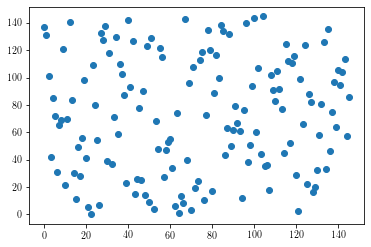

In [332]:
plt.scatter(np.argsort(dd2), np.argsort(mc2))

In [324]:
[d for n, d in G1.degree()]

[95,
 85,
 87,
 60,
 46,
 62,
 49,
 58,
 16,
 52,
 60,
 27,
 80,
 82,
 82,
 57,
 28,
 82,
 67,
 59,
 75,
 114,
 69,
 50,
 22,
 23,
 43,
 72,
 52,
 91,
 70,
 49,
 47,
 34,
 61,
 24,
 72,
 53,
 70,
 91,
 57,
 25,
 48,
 57,
 98,
 15,
 94,
 23,
 55,
 101,
 49,
 70,
 41,
 19,
 71,
 59,
 69,
 59,
 36,
 76,
 66,
 81,
 86,
 45,
 46,
 48,
 70,
 35,
 66,
 45,
 50,
 35,
 80,
 63,
 64,
 80,
 57,
 66,
 82,
 90,
 53,
 35,
 55,
 21,
 57,
 67,
 82,
 46,
 55,
 49,
 43,
 24,
 48,
 23,
 57,
 39,
 51,
 35,
 44,
 44,
 46,
 54,
 66,
 48,
 69,
 66,
 48,
 81,
 72,
 65,
 29,
 51,
 60,
 66,
 69,
 54,
 72,
 30,
 58,
 56,
 80,
 28,
 32,
 20,
 101,
 59,
 44,
 28,
 71,
 90,
 84,
 60,
 43,
 49,
 49,
 71,
 57,
 70,
 55,
 44,
 28,
 75,
 50,
 29,
 24,
 58]

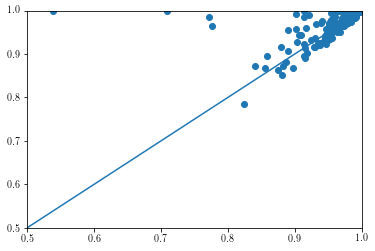

In [310]:
plt.scatter(
    np.sum((1 - u1**2)[np.newaxis] * np.array(v1)**2, axis=1),
    np.sum((1 - u2**2)[np.newaxis] * np.array(v2)**2, axis=1)
)
plt.xlim([0.5, 1])
plt.ylim([0.5, 1])
plt.plot([0.5, 1], [0.5, 1])

In [318]:
np.sum(np.array(v2)**2, axis=1)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [320]:
np.sum(((1 - u2**2)[np.newaxis] * np.array(v2).T**2), axis=1)

array([0.96903352, 0.96570428, 0.95493976, 0.9697659 , 0.96789676,
       0.98756145, 0.98424168, 0.95428595, 0.97055967, 0.95444795,
       0.96769635, 0.96926041, 0.9756477 , 0.96798454, 0.96811427,
       0.97401577, 0.97683519, 0.96896944, 0.97232283, 0.97705111,
       0.9783243 , 0.97385806, 0.96357896, 0.97813598, 0.97332984,
       0.9884434 , 0.98521537, 0.97767368, 0.9745685 , 0.98265132,
       0.98501724, 0.96878736, 0.98210964, 0.96512362, 0.97063642,
       0.97695431, 0.96616798, 0.96588881, 0.95975903, 0.97103594,
       0.97324852, 0.9813705 , 0.96752995, 0.98068257, 0.96934688,
       0.97833317, 0.97195299, 0.95391564, 0.97703115, 0.93831275,
       0.96760011, 0.96330235, 0.93411843, 0.9776726 , 0.94333537,
       0.97721914, 0.97173666, 0.9438007 , 0.96840295, 0.95706439,
       0.96664002, 0.94894542, 0.95629462, 0.95678188, 0.96189766,
       0.97217863, 0.94189087, 0.95976532, 0.92598713, 0.92054825,
       0.84504615, 0.95644963, 0.97563326, 0.96984894, 0.96085

In [315]:
((1 - u2**2)[np.newaxis] * np.array(v2)**2)[:, 8]

array([9.70693386e-05, 6.65943960e-05, 5.27666389e-03, 3.92156069e-04,
       9.35576352e-05, 6.70236031e-03, 4.56535725e-03, 2.11986719e-03,
       1.71996523e-35, 5.55844687e-03, 1.45604568e-04, 5.78596304e-34,
       3.09334721e-03, 4.66095222e-03, 9.81639924e-02, 2.66813466e-03,
       4.92042629e-04, 7.23441220e-03, 4.87814538e-03, 3.48453436e-05,
       2.67583792e-03, 8.89023591e-04, 9.28600225e-04, 3.74309204e-04,
       2.75194437e-34, 9.84749845e-05, 1.95963245e-05, 1.07989410e-03,
       1.70027984e-03, 6.86845531e-03, 7.28366335e-04, 3.42010184e-03,
       2.94430045e-04, 1.88411993e-06, 4.44850059e-03, 7.27002606e-04,
       2.81038835e-03, 6.99052576e-05, 9.30016772e-04, 3.55560910e-03,
       6.90354511e-03, 5.69721284e-33, 2.41266729e-04, 1.48551039e-03,
       2.74689781e-02, 1.12719642e-32, 1.79275955e-02, 1.12719642e-32,
       1.18802952e-02, 4.23541703e-03, 1.03535056e-05, 7.11331771e-03,
       6.52982154e-03, 9.30781037e-07, 1.75533828e-02, 3.13293418e-03,
      

In [314]:
np.sum((1 - u2**2)[np.newaxis] * np.array(v2)**2, axis=1)

array([0.89556552, 0.93268378, 0.94685069, 0.9722252 , 0.9962241 ,
       0.95147609, 0.95290519, 0.97010935, 1.        , 0.9849414 ,
       0.97086157, 1.        , 0.95234023, 0.96401249, 0.91711285,
       0.96645955, 0.98400044, 0.95746071, 0.97097243, 0.98342995,
       0.92234115, 0.78602379, 0.98445108, 0.97092931, 1.        ,
       0.99951736, 0.99919654, 0.94797955, 0.97035862, 0.8517075 ,
       0.9512795 , 0.95859808, 0.98786812, 0.98929088, 0.98963418,
       0.99621291, 0.94198452, 0.97940201, 0.98507268, 0.91316259,
       0.97881226, 1.        , 0.96580517, 0.94651481, 0.9066239 ,
       1.        , 0.86796915, 1.        , 0.96036772, 0.86318082,
       0.99853443, 0.95793876, 0.95418959, 0.99998121, 0.92437323,
       0.93511805, 0.95791915, 0.91989284, 0.98673699, 0.90303498,
       0.9158182 , 0.98395401, 0.87307342, 0.9899474 , 0.96974481,
       0.97426225, 0.9566377 , 0.9743082 , 0.97186927, 0.99430759,
       0.98018183, 0.99654399, 0.92745925, 0.94298644, 0.95407

In [307]:
np.sum((1 - u2**2)[np.newaxis] * np.array(v2)**2, axis=1)

array([0.89556552, 0.93268378, 0.94685069, 0.9722252 , 0.9962241 ,
       0.95147609, 0.95290519, 0.97010935, 1.        , 0.9849414 ,
       0.97086157, 1.        , 0.95234023, 0.96401249, 0.91711285,
       0.96645955, 0.98400044, 0.95746071, 0.97097243, 0.98342995,
       0.92234115, 0.78602379, 0.98445108, 0.97092931, 1.        ,
       0.99951736, 0.99919654, 0.94797955, 0.97035862, 0.8517075 ,
       0.9512795 , 0.95859808, 0.98786812, 0.98929088, 0.98963418,
       0.99621291, 0.94198452, 0.97940201, 0.98507268, 0.91316259,
       0.97881226, 1.        , 0.96580517, 0.94651481, 0.9066239 ,
       1.        , 0.86796915, 1.        , 0.96036772, 0.86318082,
       0.99853443, 0.95793876, 0.95418959, 0.99998121, 0.92437323,
       0.93511805, 0.95791915, 0.91989284, 0.98673699, 0.90303498,
       0.9158182 , 0.98395401, 0.87307342, 0.9899474 , 0.96974481,
       0.97426225, 0.9566377 , 0.9743082 , 0.97186927, 0.99430759,
       0.98018183, 0.99654399, 0.92745925, 0.94298644, 0.95407

In [284]:
np.sum((1 - lam**2)[np.newaxis] * v**2, axis=1)

matrix([[-3.86898166]])

In [295]:
np.array(v)

array([[-0.19508598, -0.08580506,  0.07634584, ..., -0.30065955,
         0.06428926,  0.057792  ],
       [ 0.0258513 , -0.00378416,  0.01689219, ..., -0.10125169,
         0.05314987,  0.0946899 ],
       [ 0.01195323,  0.0095172 ,  0.01668249, ...,  0.07412936,
        -0.15917312,  0.01727664],
       ...,
       [ 0.00383844, -0.00347847,  0.00829626, ..., -0.00352765,
        -0.001308  ,  0.01555912],
       [ 0.01215165,  0.00306283, -0.00858733, ..., -0.02839161,
        -0.00315693,  0.03345465],
       [-0.12501347, -0.01016776,  0.06839982, ..., -0.04484684,
        -0.14356857,  0.04677096]])

In [277]:
lam, v = np.linalg.eigh(A)
np.sum((1 - lam**2) * v**2, axis=1)

matrix([[-3.86898166]])

In [273]:
print(np.linalg.eigh(W)[0])
print(np.trace(W))

[0.03414624 0.23654435 1.00000224 1.00000569 1.00000799 1.00001136
 1.00003455 1.0000416  1.00005288 1.00005975 1.00006768 1.00007312
 1.00009426 1.00010584 1.00014993 1.00016492 1.00022144 1.00023474
 1.0002746  1.00031499 1.00038954 1.00042783 1.00046825 1.00050487
 1.00056065 1.0006471  1.00069176 1.00071329 1.00074835 1.00098894
 1.00104178 1.00115123 1.00118606 1.00134151 1.00160454 1.00163982
 1.00181591 1.00186447 1.00189542 1.00207644 1.00211705 1.00233802
 1.00245025 1.00257259 1.00274946 1.00278899 1.00293187 1.00313506
 1.0032631  1.00340239 1.00373865 1.00389029 1.00403071 1.00429813
 1.00440328 1.00457367 1.00486858 1.00542287 1.00556861 1.00605563
 1.00606598 1.00624464 1.00629322 1.00673966 1.00712815 1.00731447
 1.00779886 1.00803591 1.00825078 1.00873523 1.00929031 1.00952814
 1.01034255 1.01038013 1.01084084 1.01131177 1.01152095 1.01202359
 1.01235627 1.01277761 1.01356033 1.01410114 1.01418884 1.01527256
 1.01537851 1.01584746 1.01704289 1.01830443 1.01982193 1.0201

In [59]:
controllability = np.zeros((7, 2, 4, 25))

for idx, (baseline, uoi) in enumerate(zip(lasso_ccs, uoi_lasso_ccs)):
    control_baseline = compute_controllability_curves(
        create_symmetrized_graph(coupling_coefs=baseline)[0]
    )
    control_uoi = compute_controllability_curves(
        create_symmetrized_graph(coupling_coefs=uoi)[0],
    )
    controllability[idx, 0] = control_baseline.T
    controllability[idx, 1] = control_uoi.T

/home/psachdeva/anaconda3/envs/neuro/lib/python3.7/site-packages/numpy/linalg/linalg.py:2125: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)
/home/psachdeva/anaconda3/envs/neuro/lib/python3.7/site-packages/numpy/linalg/linalg.py:2125: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)
/home/psachdeva/anaconda3/envs/neuro/lib/python3.7/site-packages/numpy/linalg/linalg.py:2125: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


In [69]:
nx.create_create_symmetrized_graph(coupling_coefs=baseline)[0]

784

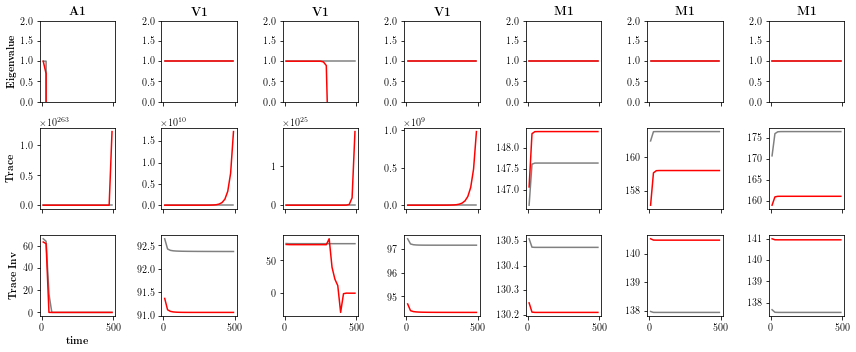

In [60]:
fig, axes = plt.subplots(3, 7, figsize=(12, 5), sharex=True)

for metric_idx in range(3):
    for data_idx in range(7):
        ax = axes[metric_idx, data_idx]
        ax.plot(np.arange(10, 500, 20), controllability[data_idx, 0, metric_idx, :], color='gray')
        ax.plot(np.arange(10, 500, 20), controllability[data_idx, 1, metric_idx, :], color='r')
        
for ax in axes[0]:
    ax.set_ylim([0, 2])
    
axes[0, 0].set_ylabel(r'\textbf{Eigenvalue}')
axes[1, 0].set_ylabel(r'\textbf{Trace}')
axes[2, 0].set_ylabel(r'\textbf{Trace Inv}')

axes[0, 0].set_title(r'\textbf{A1}')
axes[0, 1].set_title(r'\textbf{V1}')
axes[0, 2].set_title(r'\textbf{V1}')
axes[0, 3].set_title(r'\textbf{V1}')
axes[0, 4].set_title(r'\textbf{M1}')
axes[0, 5].set_title(r'\textbf{M1}')
axes[0, 6].set_title(r'\textbf{M1}')

axes[2, 0].set_xlabel(r'\textbf{time}')
plt.tight_layout()
plt.savefig('control.pdf', bbox_inches='tight')

In [47]:
controllability[0, 1, 2, :]

array([130.24846046, 130.21088162, 130.2097817 , 130.20973968,
       130.20973807, 130.20973801, 130.209738  , 130.209738  ,
       130.209738  , 130.209738  , 130.209738  , 130.209738  ,
       130.209738  , 130.209738  , 130.209738  , 130.209738  ,
       130.209738  , 130.209738  , 130.209738  , 130.209738  ,
       130.209738  , 130.209738  , 130.209738  , 130.209738  ,
       130.209738  ])

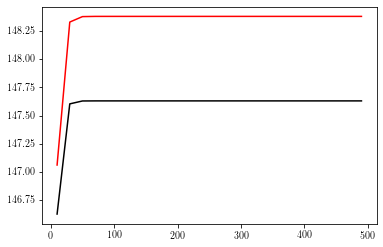

In [21]:
plt.plot(np.arange(10, 500, 20), control_baseline, color='k')
plt.plot(np.arange(10, 500, 20), control_uoi, color='r')
#plt.yscale('log')

In [59]:
in_degree = {
    key: np.array(list(dict(val.in_degree()).values()))
    for key, val in d_graphs.items()
}
out_degree = {
    key: np.array(list(dict(val.out_degree()).values()))
    for key, val in d_graphs.items()
}
modularities = {
    key: compute_modularity(val)
    for key, val in d_graphs.items()
}

In [60]:
colors = ['#4986ae', '#ff800e', '#78b26d']

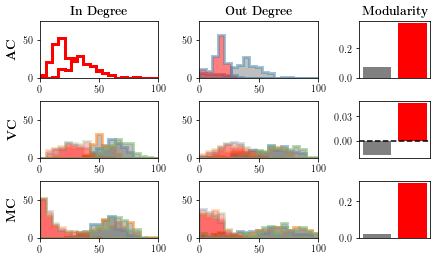

In [69]:
fig, axes = plt.subplots(3, 3, figsize=(7, 4),
                         gridspec_kw={'width_ratios': [1, 1, 0.6]})

bins = np.linspace(0, 100, 20)

axes[0, 0].hist([in_degree['ac_baseline'], in_degree['ac_uoi']],
                alpha=1.,
                color=['white', 'white'],
                bins=bins,
                histtype='step',
                stacked=True,
                edgecolor='red',
                linewidth=3)
axes[0, 1].hist(out_degree['ac_baseline'],
                alpha=0.5,
                color='gray',
                bins=bins,
                histtype='stepfilled',
                edgecolor=colors[0],
                linewidth=3)
axes[0, 1].hist(out_degree['ac_uoi'],
                alpha=0.5,
                color='red',
                bins=bins,
                histtype='stepfilled',
                edgecolor=colors[0],
                linewidth=3)

axes[1, 0].hist(in_degree['vc_monkey1_baseline'],
                alpha=0.5,
                color='gray',
                bins=bins,
                histtype='stepfilled',
                edgecolor=colors[0],
                linewidth=3)
axes[1, 0].hist(in_degree['vc_monkey1_uoi'],
                alpha=0.25,
                color='red',
                bins=bins,
                histtype='stepfilled',
                edgecolor=colors[0],
                linewidth=3)
axes[1, 0].hist(in_degree['vc_monkey2_baseline'],
                alpha=0.5,
                color='gray',
                bins=bins,
                histtype='stepfilled',
                edgecolor=colors[1],
                linewidth=3)
axes[1, 0].hist(in_degree['vc_monkey2_uoi'],
                alpha=0.25,
                color='red',
                bins=bins,
                histtype='stepfilled',
                edgecolor=colors[1],
                linewidth=3)
axes[1, 0].hist(in_degree['vc_monkey3_baseline'],
                alpha=0.5,
                color='gray',
                bins=bins,
                histtype='stepfilled',
                edgecolor=colors[2],
                linewidth=3)
axes[1, 0].hist(in_degree['vc_monkey3_uoi'],
                alpha=0.25,
                color='red',
                bins=bins,
                histtype='stepfilled',
                edgecolor=colors[2],
                linewidth=3)

axes[1, 1].hist(out_degree['vc_monkey1_baseline'],
                alpha=0.5,
                color='gray',
                bins=bins,
                histtype='stepfilled',
                edgecolor=colors[0],
                linewidth=3)
axes[1, 1].hist(out_degree['vc_monkey1_uoi'],
                alpha=0.25,
                color='red',
                bins=bins,
                histtype='stepfilled',
                edgecolor=colors[0],
                linewidth=3)
axes[1, 1].hist(out_degree['vc_monkey2_baseline'],
                alpha=0.5,
                color='gray',
                bins=bins,
                histtype='stepfilled',
                edgecolor=colors[1],
                linewidth=3)
axes[1, 1].hist(out_degree['vc_monkey2_uoi'],
                alpha=0.25,
                color='red',
                bins=bins,
                histtype='stepfilled',
                edgecolor=colors[1],
                linewidth=3)
axes[1, 1].hist(out_degree['vc_monkey3_baseline'],
                alpha=0.5,
                color='gray',
                bins=bins,
                histtype='stepfilled',
                edgecolor=colors[2],
                linewidth=3)
axes[1, 1].hist(out_degree['vc_monkey3_uoi'],
                alpha=0.25,
                color='red',
                bins=bins,
                histtype='stepfilled',
                edgecolor=colors[2],
                linewidth=3)

axes[2, 0].hist(in_degree['mc_monkey1_baseline'],
                alpha=0.5,
                color='gray',
                bins=bins,
                histtype='stepfilled',
                edgecolor=colors[0],
                linewidth=3)
axes[2, 0].hist(in_degree['mc_monkey1_uoi'],
                alpha=0.25,
                color='red',
                bins=bins,
                histtype='stepfilled',
                edgecolor=colors[0],
                linewidth=3)
axes[2, 0].hist(in_degree['mc_monkey2_baseline'],
                alpha=0.5,
                color='gray',
                bins=bins,
                histtype='stepfilled',
                edgecolor=colors[1],
                linewidth=3)
axes[2, 0].hist(in_degree['mc_monkey2_uoi'],
                alpha=0.25,
                color='red',
                bins=bins,
                histtype='stepfilled',
                edgecolor=colors[1],
                linewidth=3)
axes[2, 0].hist(in_degree['mc_monkey3_baseline'],
                alpha=0.5,
                color='gray',
                bins=bins,
                histtype='stepfilled',
                edgecolor=colors[2],
                linewidth=3)
axes[2, 0].hist(in_degree['mc_monkey3_uoi'],
                alpha=0.25,
                color='red',
                bins=bins,
                histtype='stepfilled',
                edgecolor=colors[2],
                linewidth=3)

axes[2, 1].hist(out_degree['mc_monkey1_baseline'],
                alpha=0.5,
                color='gray',
                bins=bins,
                histtype='stepfilled',
                edgecolor=colors[0],
                linewidth=3)
axes[2, 1].hist(out_degree['mc_monkey1_uoi'],
                alpha=0.25,
                color='red',
                bins=bins,
                histtype='stepfilled',
                edgecolor=colors[0],
                linewidth=3)
axes[2, 1].hist(out_degree['mc_monkey2_baseline'],
                alpha=0.5,
                color='gray',
                bins=bins,
                histtype='stepfilled',
                edgecolor=colors[1],
                linewidth=3)
axes[2, 1].hist(out_degree['mc_monkey2_uoi'],
                alpha=0.25,
                color='red',
                bins=bins,
                histtype='stepfilled',
                edgecolor=colors[1],
                linewidth=3)
axes[2, 1].hist(out_degree['mc_monkey3_baseline'],
                alpha=0.5,
                color='gray',
                bins=bins,
                histtype='stepfilled',
                edgecolor=colors[2],
                linewidth=3)
axes[2, 1].hist(out_degree['mc_monkey3_uoi'],
                alpha=0.25,
                color='red',
                bins=bins,
                histtype='stepfilled',
                edgecolor=colors[2],
                linewidth=3)
for ax in axes[:, :2].ravel():
    ax.tick_params(labelsize=10)
    ax.set_xlim([0, 100])
    ax.set_ylim([0, 75])
    
axes[0, 2].bar(x=[0, 1],
               height=[modularities['ac_baseline'], modularities['ac_uoi']],
               color=['gray', 'red'])
axes[1, 2].bar(x=[0, 1],
               height=[np.mean([modularities['vc_monkey1_baseline'],
                                modularities['vc_monkey2_baseline'],
                                modularities['vc_monkey3_baseline']]),
                       np.mean([modularities['vc_monkey1_uoi'],
                                modularities['vc_monkey2_uoi'],
                                modularities['vc_monkey3_uoi']])],
               color=['gray', 'red'])
axes[2, 2].bar(x=[0, 1],
               height=[np.mean([modularities['mc_monkey1_baseline'],
                                modularities['mc_monkey2_baseline'],
                                modularities['mc_monkey3_baseline']]),
                       np.mean([modularities['mc_monkey1_uoi'],
                                modularities['mc_monkey2_uoi'],
                                modularities['mc_monkey3_uoi']])],
               color=['gray', 'red'])

axes[1, 2].axhline(0, color='k', linestyle='--')
axes[1, 2].set_yticks([0, 0.03])
for ax in axes[:, 2]:
    ax.set_xlim([-0.5, 1.5])
    ax.tick_params(labelsize=10)
    ax.set_xticks([])

axes[0, 0].set_title(r'\textbf{In Degree}', fontsize=12)
axes[0, 1].set_title(r'\textbf{Out Degree}', fontsize=12)
axes[0, 2].set_title(r'\textbf{Modularity}', fontsize=12)
axes[0, 0].set_ylabel(r'\textbf{AC}', fontsize=13)
axes[1, 0].set_ylabel(r'\textbf{VC}', fontsize=13)
axes[2, 0].set_ylabel(r'\textbf{MC}', fontsize=13)

plt.subplots_adjust(hspace=0.4, wspace=0.4)